In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'bold'   # 设置字体加粗
plt.rcParams['axes.unicode_minus'] = False  # 上述字库没负号，因此负号不进行字体变换

一、去除除草剂后

In [2]:
#定义食物链的动态微分方程
def model(y,t,r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e):
    P,I,C=y
    dPdt=P*r_P*w*(1-P/K_P)-P*I*alpha_PI
    dIdt=-beta_I*gamma_I*I+e*alpha_PI*P*I-alpha_IC*I*C
    dCdt=-beta_C*C+e*alpha_IC*I*C
    return [dPdt,dIdt,dCdt]

In [3]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者和昆虫的相互作用系数
w=0.8#除草剂对生产者生产速率的影响（失去除草剂，种间竞争，会降低生产者的自然增长率）
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.005#昆虫和次级捕食者的相互作用系数
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
e=0.1#能量传递效率

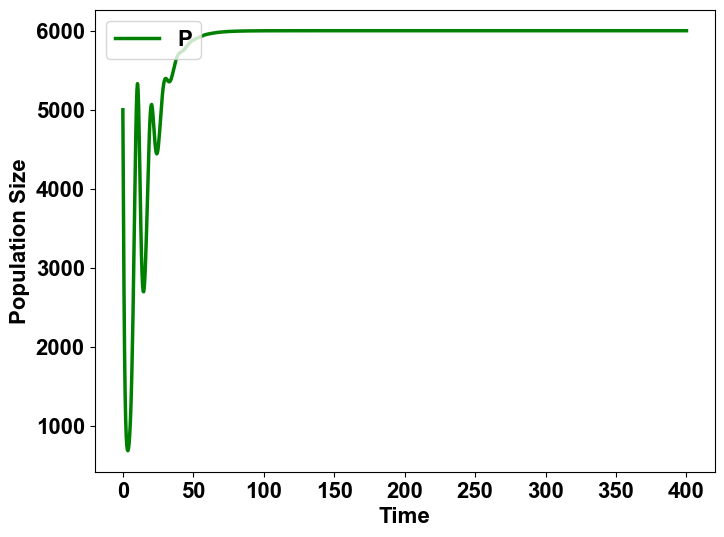

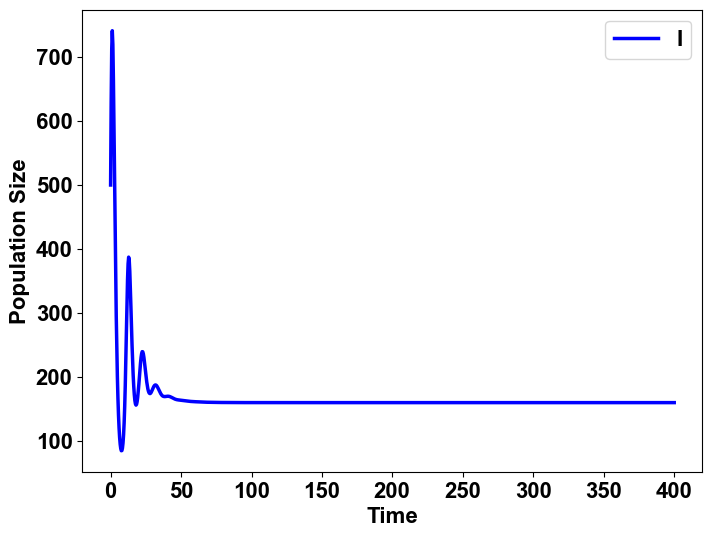

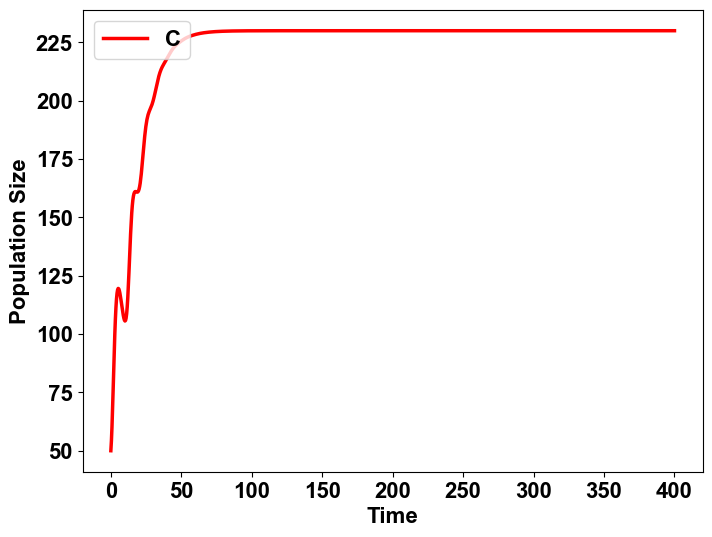

In [5]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C0=50#初始次级消费者的数量
y0=[P0,I0,C0]
#时间网格
t=np.linspace(0,400,1000)
solution=odeint(model,y0,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e))
P,I,C=solution.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P,label="P",c="g",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper left")

plt.figure(figsize=(8,6))
plt.plot(t,I,label="I",c="b",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C,label="C",c="r",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper left")

二、通过引入蝙蝠，探讨蝙蝠在生态系统中扮演的角色

In [6]:
#定义食物链的动态微分方程
def model_1(y,t,r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,sigma):
    P,I,C1,C2=y
    dPdt=P*r_P*w*(1-P/K_P)-P*I*alpha_PI+sigma*P*C1
    dIdt=-beta_I*gamma_I*I+e*alpha_PI*P*I-alpha_IC*I*C1-alpha_IC*I*C2
    dC1dt=-beta_C*C1+e*alpha_IC*I*C1
    dC2dt=-beta_C*C2+e*alpha_IC*I*C2
    return [dPdt,dIdt,dC1dt,dC2dt]

In [7]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者和昆虫的相互作用系数
w=0.8#除草剂对生产者生产速率的影响（失去除草剂，种间竞争，会降低生产者的自然增长率）
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.005#昆虫和次级消费者的相互作用系数
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
sigma=0.002#蝙蝠的传粉作用对生产者的自然增长率的促进作用
e=0.1#能量传递效率

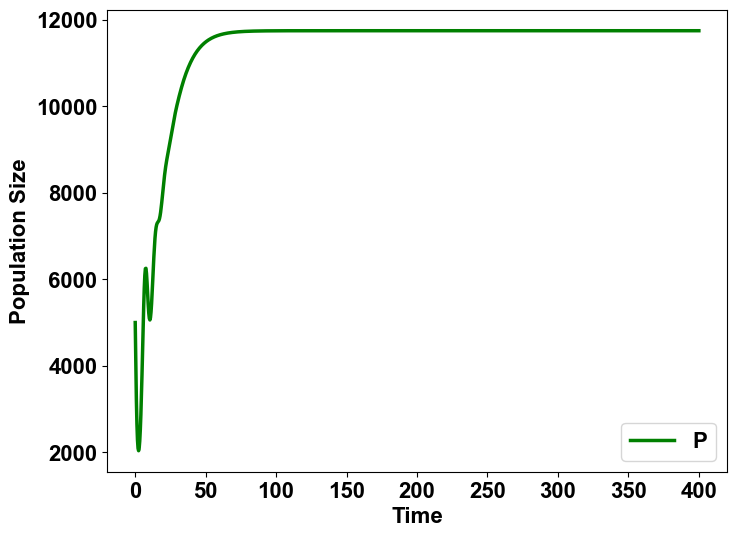

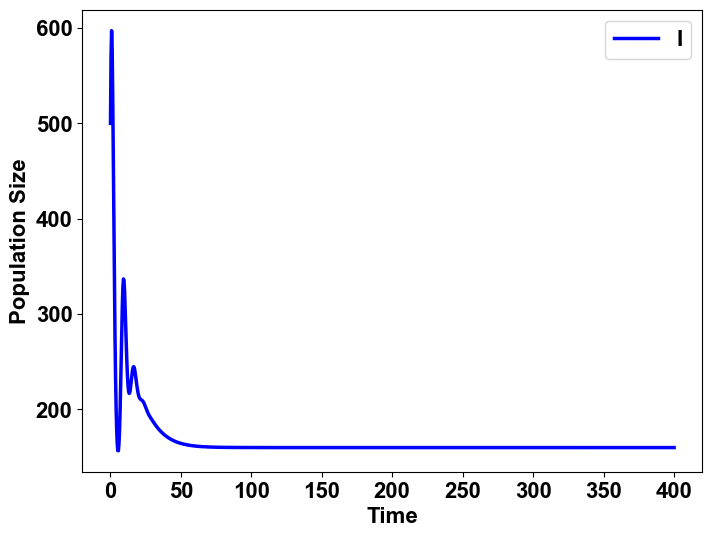

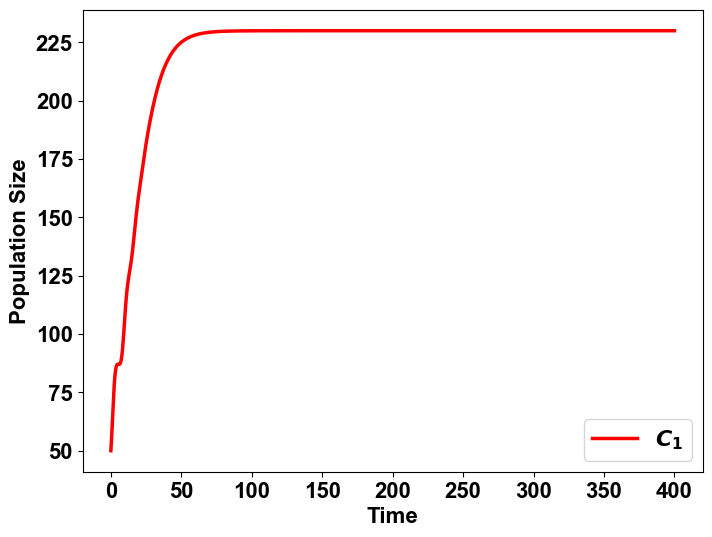

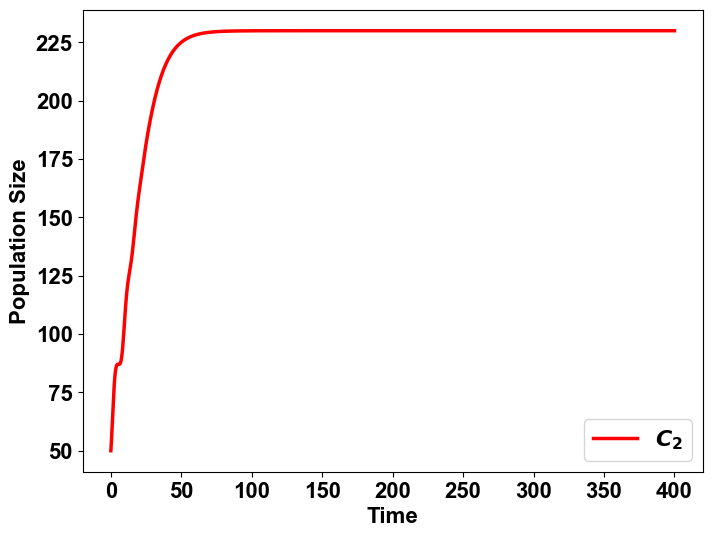

In [ ]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C1_0=50#蝙蝠的数量
C2_0=50#初始次级消费者的数量
y0=[P0,I0,C1_0,C2_0]
#时间网格
t=np.linspace(0,400,1000)
solution=odeint(model_1,y0,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,sigma))
P,I,C_1,C_2=solution.T
#绘制结果
plt.figure(figsize=(8,6))
plt.plot(t,P,label="P",c="g",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="lower right")

plt.figure(figsize=(8,6))
plt.plot(t,I,label="I",c="b",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C_1,label=r"$C_{1}$",c="r",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="lower right")

plt.figure(figsize=(8,6))
plt.plot(t,C_2,label=r"$C_{2}$",c="r",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="lower right")

三、引入更高级消费者

In [13]:
#定义食物链的动态微分方程
def model_3(y,t,r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,sigma,alpha_CD,beta_D):
    P,I,C1,C2,D=y
    dPdt=P*r_P*w*(1-P/K_P)-P*I*alpha_PI+sigma*P*C1
    dIdt=-beta_I*gamma_I*I+e*alpha_PI*P*I-alpha_IC*I*C1-alpha_IC*I*C2
    dC1dt=-beta_C*C1+e*alpha_IC*I*C1-alpha_CD*C1*D
    dC2dt=-beta_C*C2+e*alpha_IC*I*C2-alpha_CD*C2*D
    dDdt=-beta_D*D+e*alpha_CD*C1*D+e*alpha_CD*C2*D
    return [dPdt,dIdt,dC1dt,dC2dt,dDdt]

In [14]:
#定义模型参数
r_P=1#生产者的自然增长率
K_P=10000#生产者的环境承载量
alpha_PI=0.002#生产者和昆虫的相互作用系数
w=0.8#除草剂对生产者生产速率的影响（失去除草剂，种间竞争，会降低生产者的自然增长率）
beta_I=0.05#昆虫的自然死亡率
alpha_IC=0.005#昆虫和次级捕食者的相互作用系数
gamma_I=1#杀虫剂对昆虫的杀害效果
beta_C=0.08#次级捕食者的自然死亡率
sigma=0.002#蝙蝠的传粉作用对生产者的自然增长率的促进作用
e=0.1#能量传递效率
alpha_CD=0.005#次级捕食者和三级捕食者的相互作用系数
beta_D=0.08#三级捕食者的自然死亡率

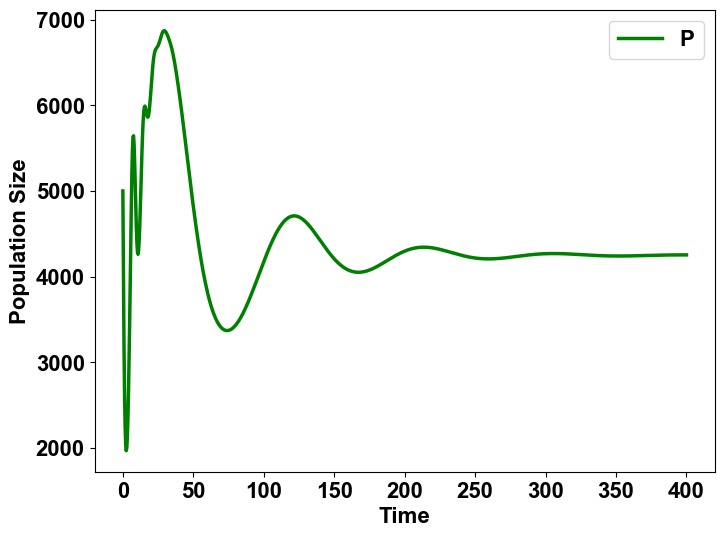

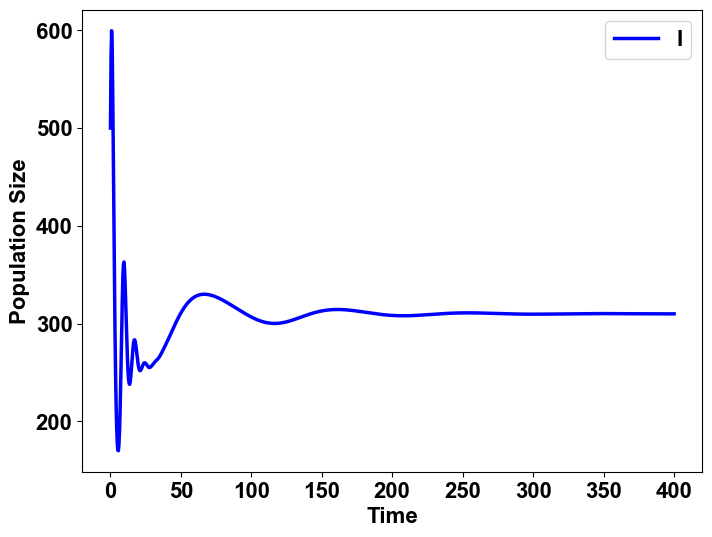

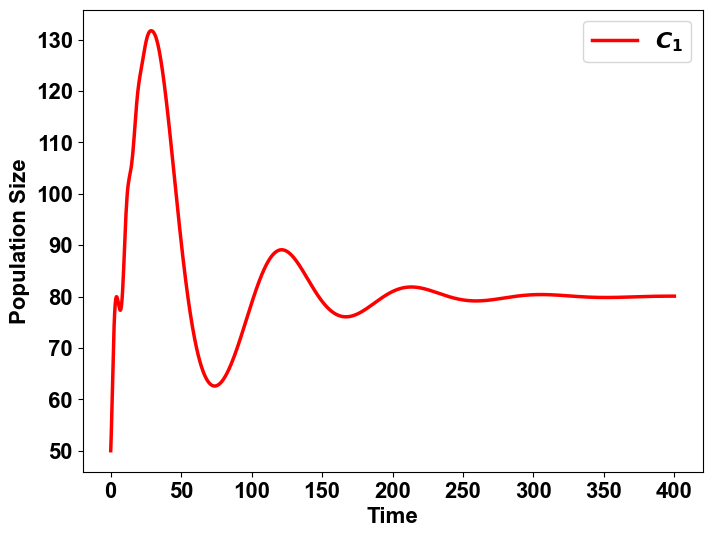

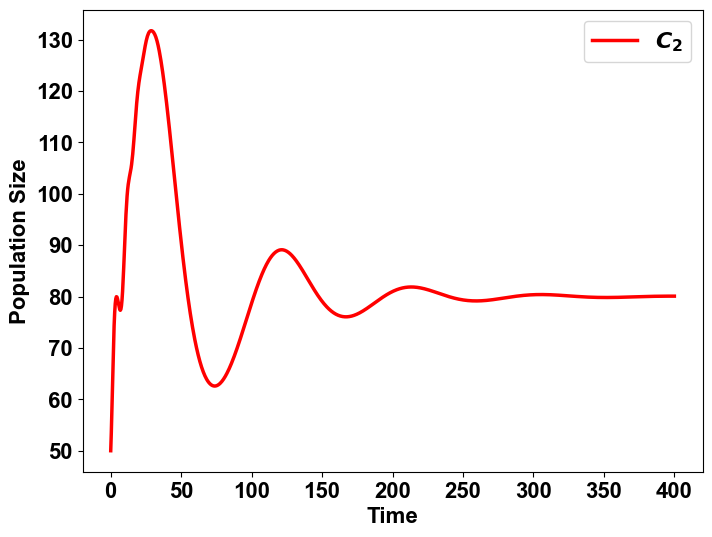

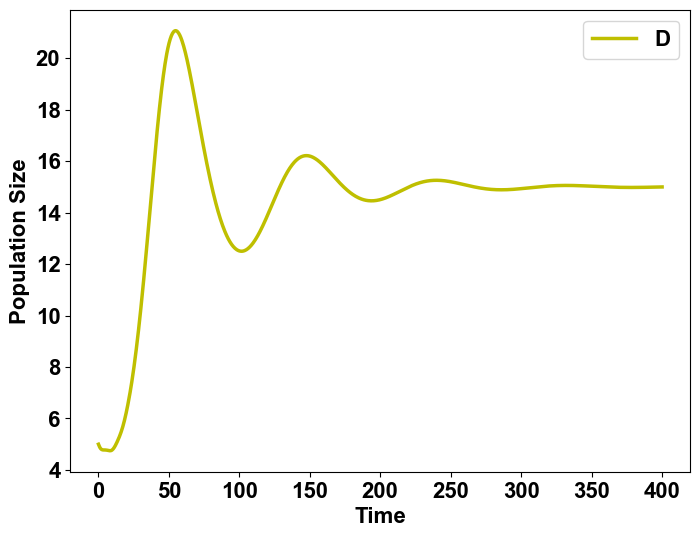

In [17]:
#初始条件
P0=5000#初始生产者的数量
I0=500#初始初级消费者的数量
C1_0=50#蝙蝠的数量
C2_0=50#初始次级消费者的数量
D0=5#初始更高级消费者的数量
y0=[P0,I0,C1_0,C2_0,D0]
#时间网格
t=np.linspace(0,400,1000)
solution=odeint(model_3,y0,t,args=(r_P,K_P,alpha_PI,w,beta_I,alpha_IC,gamma_I,beta_C,e,sigma,alpha_CD,beta_D))
P,I,C_1,C_2,D=solution.T
plt.figure(figsize=(8,6))
plt.plot(t,P,label="P",c="g",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,I,label="I",c="b",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C_1,label=r"$C_{1}$",c="r",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,C_2,label=r"$C_{2}$",c="r",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")

plt.figure(figsize=(8,6))
plt.plot(t,D,label="D",c="y",linewidth=2.5)
plt.xlabel("Time",weight='bold')
plt.ylabel("Population Size",weight='bold')
plt.legend(loc="upper right")